In [1]:
using Revise
includet("job.jl")

Precompiling packages...
  14565.7 ms  ✓ SSMCMain
  1 dependency successfully precompiled in 18 seconds. 528 already precompiled.


In [2]:
using CairoMakie

# Testing the sampler

In [66]:
m = 0.1
me = log10(m)
mev = 0.1

Dse = -12
Dsev = 0.
Dre = 0.
Drev = 0.

la = 1.0
lb = 0.5

ce = 0.7
cev = 0.1

sr = 0.2
sb = 0.5

K = 10.

rsg = RSGJans1(10, 10;
    m=base10_lognormal(me, mev),
    Ds=base10_lognormal(Dse, Dsev),
    Dr=base10_lognormal(Dre, Drev),
    
    l=Beta(la, lb),
    c=base10_lognormal(ce, cev), # perhaps the simplest case of a unimodal c dist.
    sparsity_resources=sr,
    sparsity_byproducts=sb,

    # fix influx resources as one (as there has been interest in this setup)
    num_influx_resources=Dirac(1),
    K=Dirac(K),
)

RSGJans1{LogNormal{Float64}, Dirac{Float64}, LogNormal{Float64}, LogNormal{Float64}, Dirac{Int64}, Dirac{Float64}, Dirac{Int64}, Dirac{Int64}, LogNormal{Float64}, Beta{Float64}}(10, 10, LogNormal{Float64}(μ=-2.302585092994046, σ=0.2302585092994046), Dirac{Float64}(value=1.0), LogNormal{Float64}(μ=-27.63102111592855, σ=0.0), LogNormal{Float64}(μ=0.0, σ=0.0), Dirac{Int64}(value=1), Dirac{Float64}(value=10.0), Dirac{Int64}(value=2), Dirac{Int64}(value=5), LogNormal{Float64}(μ=1.611809565095832, σ=0.2302585092994046), Beta{Float64}(α=1.0, β=0.5), nothing)

In [57]:
xx = do_run_unimodal_c(rsg.Ns, me, mev, Dse, Dsev, Dre, Drev, la, lb, ce, cev, sr, sb, K;
    num_repeats=1000,
    Nks=10000,
)

┌ Warning: Getting less than 90.0% good runs!! cm is Dict(-1 => 993, 1 => 7)
└ @ Main ~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/rg_nomad_unstructured2/job.jl:65


(-1.0, Dict(-1 => 993, 1 => 7))

## Running a single system

In [83]:
ps = rsg();

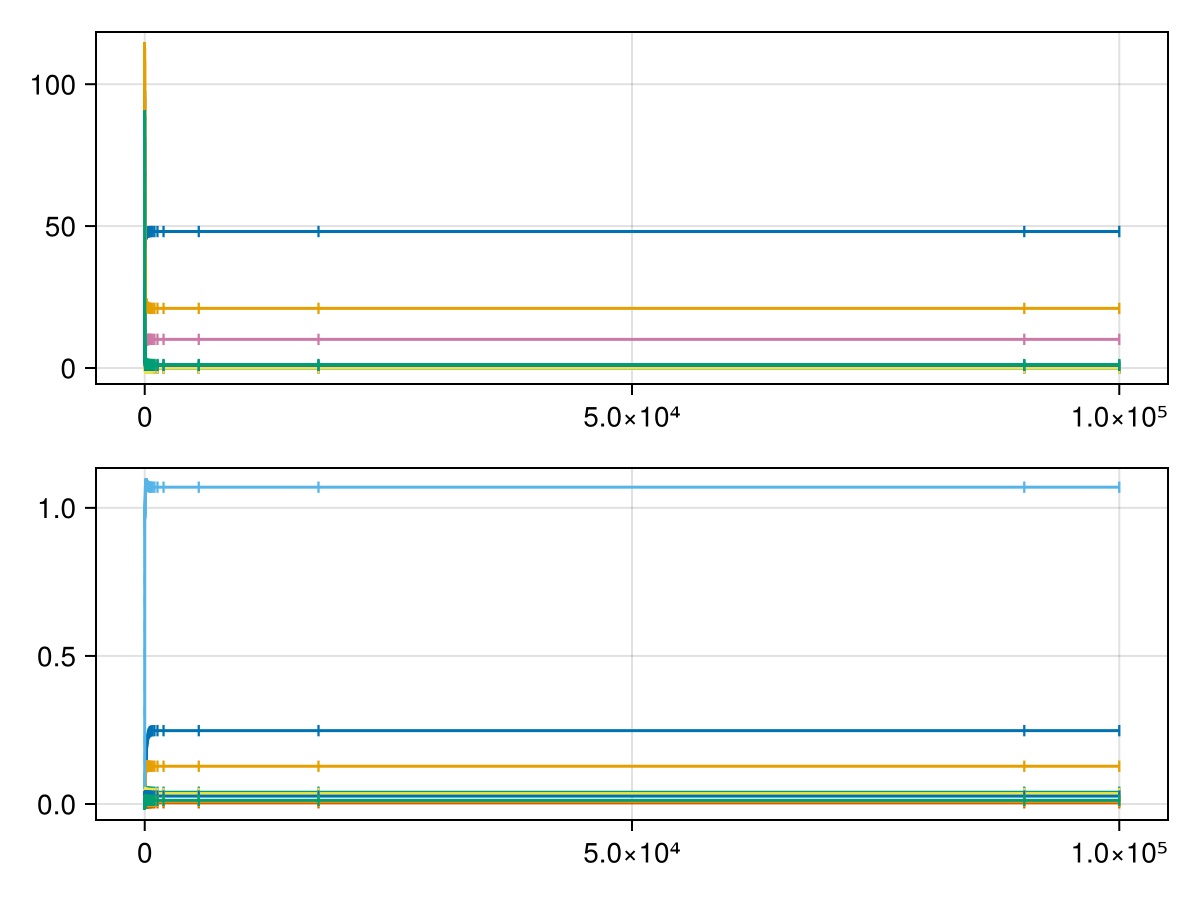

(sort(biom))[end - 5:end] = [0.2073502230103179, 0.9557954340432778, 1.2276655163428274, 10.095130843043506, 21.00881458659349, 48.08709111339389]


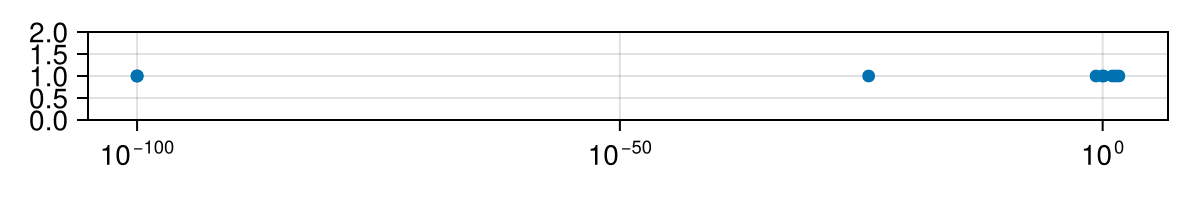

In [84]:
u0 = make_u0_smart(ps;
    # u0=[1., 1., 0., 0., 0.],
    u0rand=0.
)

p = make_mmicrm_problem(ps, u0, 100000)
s = solve(p)

check_mmicrmparams(ps)
# param_summary(p.p)

display(plot_mmicrm_sol(s))
s[end];

ss = s[end]
biom = ss[1:get_Ns(ps)[1]]
@show sort(biom)[end-5:end]
scatter(clamp.(biom, 1e-100, Inf), fill(1, length(biom));
    axis=(; xscale=log10),
    figure=(; size=(600,100))
)

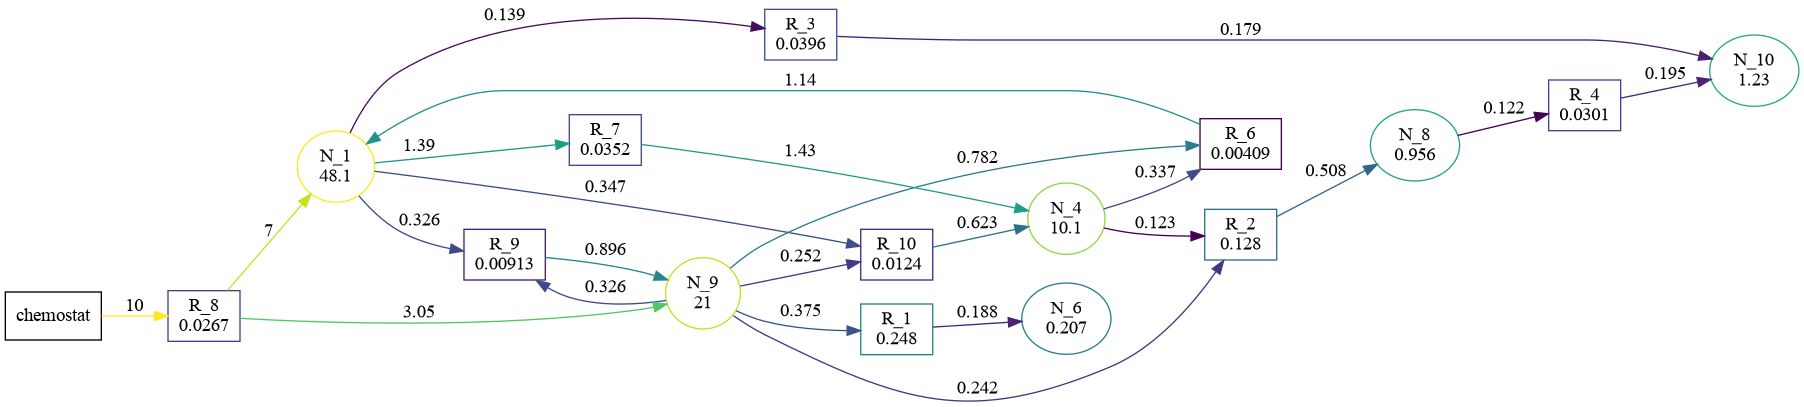

In [94]:
diagram_sfss_v3(ps, s[end];
    strain_threshold=1e-1,
    edge_threshold=1e-1,
    colorscale=log10,
    # cluster=true
)

In [86]:
usol = s.u[end]
#usol = sssol.u
#usol = Symbolics.value.(getindex.(symsol[2], 2))
show(maximum(abs, uninplace(mmicrmfunc!)(usol, ps, 0)))

2.8864031221719704e-14

mrl = 0.00019296374129340864


[ Info: Unstable, mrl is 0.000192964


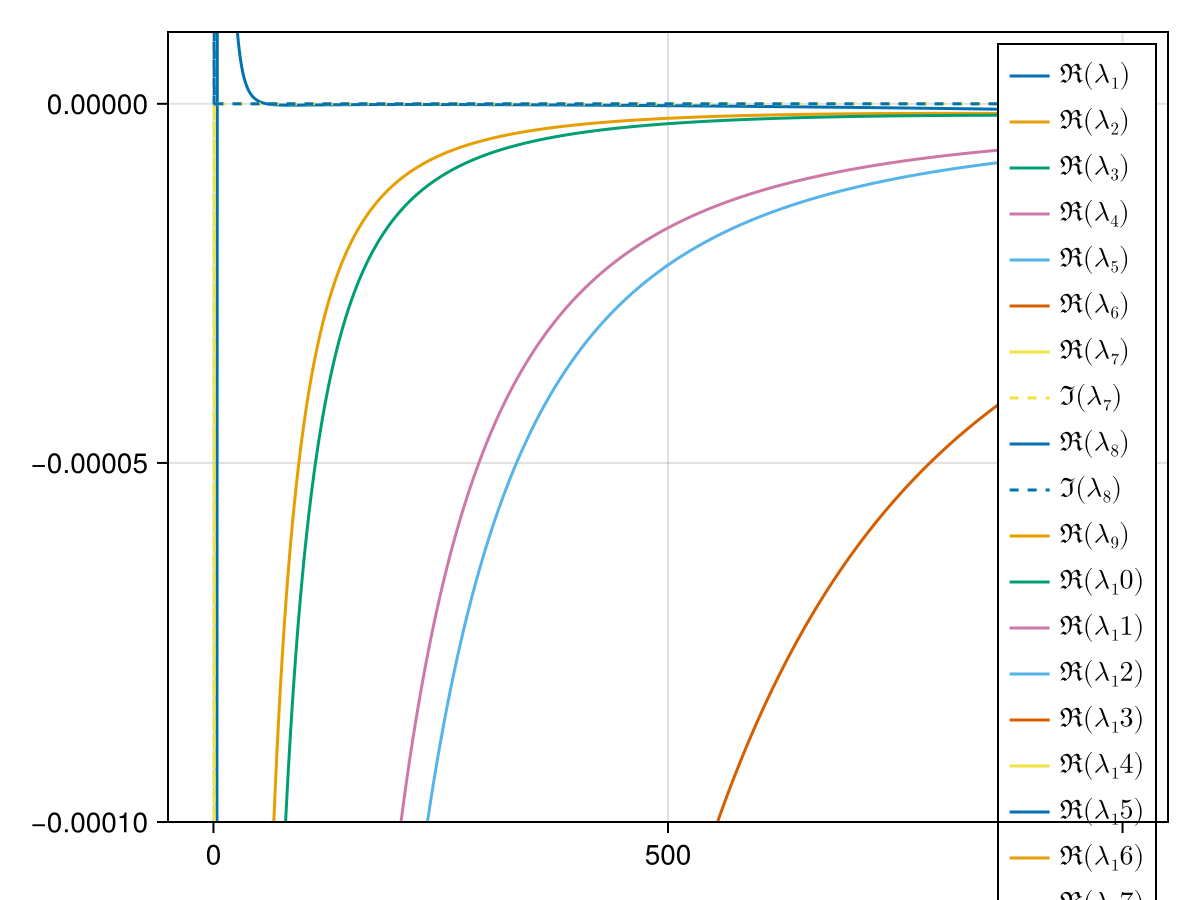

In [93]:
ks = LinRange(0., 1000., 10000)
lambda_func = linstab_make_k_func(ps, get_Ds(ps), usol)
full_linstab_func = linstab_make_k_func(ps, get_Ds(ps), usol; returnobj=:full)

lambdas = lambda_func.(ks)
mrl = maximum(x->maximum(real,x), lambdas)
@show mrl

faa = plot_linstab_lambdas(ks, lambdas)
ylims!(faa.axis, (-1e-4, 1e-5))
# xlims!(faa.axis, (0., 2.))
faa

# Testing the main functions

In [41]:
main1(;
    N=10,
    num_starts=1,
    num_prescreens=5,
    num_repeats=100,
    max_nomad_time=60,
    max_single_solver_time=5
)

┌ Warning: Getting less than 90.0% good runs!! cm is Dict(-1015 => 89, -1004 => 11)
└ @ Main ~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/rg_nomad_unstructured2/job.jl:65
┌ Warning: Getting less than 90.0% good runs!! cm is Dict(-1015 => 89, -1 => 1, -1004 => 9, -23 => 1)
└ @ Main ~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/rg_nomad_unstructured2/job.jl:65
┌ Warning: Getting less than 90.0% good runs!! cm is Dict(-1015 => 17, -1004 => 52, -23 => 31)
└ @ Main ~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/rg_nomad_unstructured2/job.jl:65
┌ Warning: Could not find a satisfactory u0 during prescreening
└ @ Main ~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode/cluster_env/runs/rg_nomad_unstructured2/job.jl:119


OBJ ( SOL ) BBE BBO
 -0       	(   1.736012   0        -12          0          0          0          1.635716   9.787315   9.827357   0          0.789204   0.174252 )	1 -0.000000 
 -0.020202	(   3.736012   0        -12          0         10          0          1.635716   9.787315  10          0          0.789204   0.174252 )	2 -0.020202 
 -0       	(   9.736012   0        -12          0         40          0          1.635716   9.787315  10          0          0.789204   0.174252 )	3 -0.000000 
 -0       	(   3.736012   0        -12          0         60          0          1.635716   9.787315  10          0          0.789204   0.174252 )	4 -0.000000 
 -0       	(   8.736012   0        -12          0         10          0          1.635716   9.787315  10          0          0.789204   0.174252 )	5 -0.000000 
 -0       	(   3.736012   1        -12          0         10          0          1.635716   9.787315  10          0          0.789204   0.174252 )	6 -0.000000 
 -0       	(   3.736

1-element Vector{Any}:
 Any[([-9.473911197357424, 0.0, -12.0, 0.0, 0.0, 0.0, 8.648828034688892, 4.991961055611224, 3.0207496970309258, 0.0, 0.8021003618851059, 0.8486607188400613], -1.0, Dict(-1015 => 89, -1004 => 11)), ([-2.393112450636437, 0.0, -12.0, 0.0, 0.0, 0.0, 5.145456536666064, 6.796117468165095, -9.508118935658715, 0.0, 0.5398876061092748, 0.03348710384727083], 0.0, Dict(1 => 100)), ([-7.760219073183525, 0.0, -12.0, 0.0, 0.0, 0.0, 7.876054815788489, 3.118121664549771, -4.762040086025436, 0.0, 0.8801161952248524, 0.6839169164988529], -1.0, Dict(-1015 => 89, -1 => 1, -1004 => 9, -23 => 1)), ([-9.264576585041166, 0.0, -12.0, 0.0, 0.0, 0.0, 0.07371448084045662, 2.555676443177932, -4.842253249729174, 0.0, 0.6128565351935596, 0.7786126855220712], -1.0, Dict(-1015 => 17, -1004 => 52, -23 => 31)), ([1.7360123648334174, 0.0, -12.0, 0.0, 0.0, 0.0, 1.6357158450522857, 9.787315028722833, 9.827356840923013, 0.0, 0.7892037936277292, 0.1742520337873078], 0.0, Dict(1 => 98, 23 => 2)), ([1.73